## Imports

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datasets import Dataset

## Load data

In [97]:
# phenotypes
phen_df = pd.read_csv("data/all_phenotypes.tsv", sep="\t", header=0)
# static features
static_df = pd.read_csv("data/static_features.tsv", sep="\t", header=0)
static_df.sort_values(by="participant_id",ascending=True,inplace=True)
phen_df.sort_values(by="participant_id",ascending=True,inplace=True)

## Create labels

In [98]:
phen_df

,participant_id,redcap_repeat_instrument,redcap_repeat_instance,selected_language,age,is_control_participant,laryng_cancer,benign_cord_lesion,rrp,spas_dys,...,vocabulary_item_word_6,vocabulary_item_difficulty_6,random_session_id,random_recording_acoustic_task_id,random_duration,random_item_generation_category,Voice Disorders,Neurological and Neurodegenerative Disorders,Mood and Psychiatric Disorders,Respiratory Disorders
0,004d42e9,Participant,1.0,English,75.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,affirmation,3.0,07031CC3,A91D679E-201E-49AF-AD3D-D988836B3BCC,83.0,English words starting with 't',False,True,True,False
1,01401050,Participant,1.0,English,74.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,surreal,3.0,09E64686,AAC88E40-7F5C-40D6-BA68-93A01923E467,192.0,Letters,False,True,True,False
2,016023f6,Participant,1.0,English,78.0,No,Unchecked,Unchecked,Unchecked,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
3,02624589,Participant,1.0,English,82.0,No,Unchecked,Unchecked,Unchecked,Checked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
4,02955d67,Participant,1.0,English,76.0,Yes,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,fc603d45,Participant,1.0,English,81.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,compartmentalize,3.0,CD772E40,A8ABD411-49FB-4FAE-8E58-445A1A3BE711,64.0,Animals,False,True,False,False
438,fc61a1ff,Participant,1.0,English,72.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True
439,fe6cefa7,Participant,1.0,English,50.0,No,Unchecked,Unchecked,Unchecked,Unchecked,...,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,True
440,ff58dff0,Participant,1.0,English,21.0,Yes,Unchecked,Unchecked,Unchecked,Unchecked,...,aquaplane,3.0,A5484A20,0598F4BC-52E6-4302-8EF7-F3C9AA6097DE,50.0,Numbers,True,True,True,True


#### Add vocal disorder binary labels to static df

In [99]:
phen_df["Voice Disorders"].value_counts()

Voice Disorders
True     230
False    212
Name: count, dtype: int64

In [100]:
static_df["Voice Disorders"] = [int(phen_df[phen_df["participant_id"] == row.participant_id]["Voice Disorders"].tolist()[0]) for idx,row in static_df.iterrows()]

In [101]:
static_df

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,local_shimmer,localDB_shimmer,apq3_shimmer,apq5_shimmer,apq11_shimmer,dda_shimmer,stoi,pesq,si_sdr,Voice Disorders
0,004d42e9,07031CC3,Animal-fluency,"Dogs, cats, lions, panthers, leopards, elephan...",30.849073,0.205649,26.938833,32.299248,36.319099,9.380266,...,0.140185,1.279872,0.062109,0.065476,0.063903,0.186326,0.594471,1.159233,-14.364435,0
26,004d42e9,07031CC3,Productive-Vocabulary-1,broccoli broccoli is a green vegetable and hea...,34.447186,0.057132,32.960548,33.506256,36.057877,3.097328,...,0.081463,0.909085,0.037340,0.037903,0.054074,0.112019,0.802794,1.277508,-0.301972,0
27,004d42e9,07031CC3,Productive-Vocabulary-2,"Capitalization. Hmm. Could be, um, when you're...",35.895359,0.092448,33.253757,35.642937,37.830379,4.576622,...,0.105887,1.090807,0.052075,0.067322,0.076049,0.156226,0.742845,1.199748,-1.893810,0
28,004d42e9,07031CC3,Productive-Vocabulary-3,Unsuitable. Not correct. Or... I said not corr...,35.248405,0.101374,33.987968,36.224056,37.653236,3.665268,...,0.111295,1.158668,0.050776,0.061889,0.081749,0.152328,0.705393,1.185849,-3.215629,0
29,004d42e9,07031CC3,Productive-Vocabulary-4,Minority. Minority is the lesser group.,33.798946,0.114689,32.843185,34.022396,36.028976,3.185791,...,0.119717,1.170932,0.056202,0.063807,0.061901,0.168605,0.818446,1.240876,-1.725452,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,ff75b163,6A3E7090,Diadochokinesis-TA,Ta ta ta ta ta ta ta ta ta ta ta,26.530842,0.038758,25.860199,26.675362,27.344505,1.484306,...,0.093277,0.994439,0.029967,0.051134,0.088584,0.089901,0.993067,3.620620,25.058619,1
19246,ff75b163,6A3E7090,Diadochokinesis-buttercup,"Markup, markup, markup, markup, markup, markup...",27.925495,0.054326,27.288794,28.198372,28.900181,1.611387,...,0.172056,1.558691,0.075453,0.125921,0.179042,0.226358,0.943791,2.379631,17.349405,1
19247,ff75b163,6A3E7090,Free-Speech,I came to the physician because I had a feelin...,25.366678,0.090976,23.924431,25.256680,26.426678,2.502247,...,0.099615,1.020855,0.036914,0.055092,0.096946,0.110742,0.898831,1.960933,12.243779,1
19249,ff75b163,6A3E7090,Free-speech-2,NaN,26.703327,0.166226,24.957359,26.008017,27.915869,2.958509,...,0.122538,1.161885,0.044590,0.064484,0.138375,0.133770,0.869760,1.683203,6.723745,1


#### Add different vocal disorders to static df as multi-class

In [104]:
voc_disorders = ["benign_cord_lesion","rrp","spas_dys","voc_fold_paralysis"]
voc_disorder_participant_disorder_map = {d:[] for d in voc_disorders}
voc_disorder_participant_map = {}
voc_disorder_map = {"benign_cord_lesion":1, "rrp":2, "spas_dys":3, "voc_fold_paralysis":4,"unspecified":5}
for p in static_df["participant_id"].unique():
    for v in voc_disorders:
        curr_status = phen_df[phen_df["participant_id"]==p][v].tolist()[0]
        if curr_status == "Checked":
            voc_disorder_participant_disorder_map[v].append(p)
            voc_disorder_participant_map[p] = voc_disorder_map[v]
    if phen_df[phen_df["participant_id"]==p]["Voice Disorders"].tolist()[0] == 1 and p not in voc_disorder_participant_map:
        voc_disorder_participant_disorder_map[v].append(p)
        voc_disorder_participant_map[p] = voc_disorder_map["unspecified"]


static_df["multiclass_label"] = [voc_disorder_participant_map.get(row.participant_id, 0) for idx,row in static_df.iterrows()]
static_df["benign_cord_lesion"] = [1 if row.participant_id in voc_disorder_participant_disorder_map["benign_cord_lesion"] else 0 for idx,row in static_df.iterrows()]
static_df["rrp"] = [1 if row.participant_id in voc_disorder_participant_disorder_map["rrp"] else 0 for idx,row in static_df.iterrows()]
static_df["spas_dys"] = [1 if row.participant_id in voc_disorder_participant_disorder_map["spas_dys"] else 0 for idx,row in static_df.iterrows()]
static_df["voc_fold_paralysis"] = [1 if row.participant_id in voc_disorder_participant_disorder_map["voc_fold_paralysis"] else 0 for idx,row in static_df.iterrows()]

static_df
    

,participant_id,session_id,task_name,transcription,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,...,dda_shimmer,stoi,pesq,si_sdr,Voice Disorders,multiclass_label,benign_cord_lesion,rrp,spas_dys,voc_fold_paralysis
0,004d42e9,07031CC3,Animal-fluency,"Dogs, cats, lions, panthers, leopards, elephan...",30.849073,0.205649,26.938833,32.299248,36.319099,9.380266,...,0.186326,0.594471,1.159233,-14.364435,0,0,0,0,0,0
26,004d42e9,07031CC3,Productive-Vocabulary-1,broccoli broccoli is a green vegetable and hea...,34.447186,0.057132,32.960548,33.506256,36.057877,3.097328,...,0.112019,0.802794,1.277508,-0.301972,0,0,0,0,0,0
27,004d42e9,07031CC3,Productive-Vocabulary-2,"Capitalization. Hmm. Could be, um, when you're...",35.895359,0.092448,33.253757,35.642937,37.830379,4.576622,...,0.156226,0.742845,1.199748,-1.893810,0,0,0,0,0,0
28,004d42e9,07031CC3,Productive-Vocabulary-3,Unsuitable. Not correct. Or... I said not corr...,35.248405,0.101374,33.987968,36.224056,37.653236,3.665268,...,0.152328,0.705393,1.185849,-3.215629,0,0,0,0,0,0
29,004d42e9,07031CC3,Productive-Vocabulary-4,Minority. Minority is the lesser group.,33.798946,0.114689,32.843185,34.022396,36.028976,3.185791,...,0.168605,0.818446,1.240876,-1.725452,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19245,ff75b163,6A3E7090,Diadochokinesis-TA,Ta ta ta ta ta ta ta ta ta ta ta,26.530842,0.038758,25.860199,26.675362,27.344505,1.484306,...,0.089901,0.993067,3.620620,25.058619,1,1,1,0,0,0
19246,ff75b163,6A3E7090,Diadochokinesis-buttercup,"Markup, markup, markup, markup, markup, markup...",27.925495,0.054326,27.288794,28.198372,28.900181,1.611387,...,0.226358,0.943791,2.379631,17.349405,1,1,1,0,0,0
19247,ff75b163,6A3E7090,Free-Speech,I came to the physician because I had a feelin...,25.366678,0.090976,23.924431,25.256680,26.426678,2.502247,...,0.110742,0.898831,1.960933,12.243779,1,1,1,0,0,0
19249,ff75b163,6A3E7090,Free-speech-2,NaN,26.703327,0.166226,24.957359,26.008017,27.915869,2.958509,...,0.133770,0.869760,1.683203,6.723745,1,1,1,0,0,0


In [105]:
static_df["multiclass_label"].unique()

array([0, 3, 5, 1, 2, 4])

In [106]:
y = static_df["Voice Disorders"].copy()
y_multiclass = static_df["multiclass_label"].copy()
X = static_df.copy().drop(columns=["participant_id", "session_id","task_name","transcription","Voice Disorders","multiclass_label"]+voc_disorders)
print(X.shape, y.shape, y_multiclass.shape)

(19271, 131) (19271,) (19271,)


## Calculate group numbers

In [107]:
# calculate group numbers
all_groups = np.array(static_df["participant_id"].tolist())
uniq_groups = static_df["participant_id"].unique()
static_df["participant_id_int"] = [np.where(uniq_groups==row.participant_id)[0][0] for idx,row in static_df.iterrows()]
static_df[["participant_id_int","participant_id"]]

,participant_id_int,participant_id
0,0,004d42e9
26,0,004d42e9
27,0,004d42e9
28,0,004d42e9
29,0,004d42e9
...,...,...
19245,441,ff75b163
19246,441,ff75b163
19247,441,ff75b163
19249,441,ff75b163


In [108]:
groups = static_df["participant_id_int"].copy()
groups

0          0
26         0
27         0
28         0
29         0
        ... 
19245    441
19246    441
19247    441
19249    441
19270    441
Name: participant_id_int, Length: 19271, dtype: int64

## Drop NaNs

#### Drop columns with NaNs over some threshold

In [109]:
# drop nans
nans = X.isna().sum()
thresh_nans = nans[nans>50]
print(len(thresh_nans))

35


In [110]:
thresh_nans

speaking_rate                      83
articulation_rate                  83
phonation_ratio                    83
pause_rate                         83
mean_pause_duration                83
mean_f0_hertz                     443
std_f0_hertz                      522
mean_hnr_db                        79
spectral_slope                    538
spectral_tilt                     538
cepstral_peak_prominence_mean     751
cepstral_peak_prominence_std      751
mean_f1_loc                       166
std_f1_loc                        166
mean_b1_loc                       166
std_b1_loc                        166
mean_f2_loc                       166
std_f2_loc                        166
mean_b2_loc                       166
std_b2_loc                        166
spectral_gravity                  453
spectral_std_dev                  453
spectral_skewness                 453
spectral_kurtosis                 453
local_jitter                      538
localabsolute_jitter              538
rap_jitter  

In [111]:
X.drop(columns=thresh_nans.index,inplace=True)
print(X.shape)

(19271, 96)


#### Drop rows with NaNs under threshold

In [112]:
nans = X.isna().sum()
nans[nans>0]

std_intensity_db     2
std_hnr_db          14
stoi                17
pesq                17
si_sdr              17
dtype: int64

In [113]:
# drop rows
inds_to_drop = []
inds_to_drop.extend(X[X["std_intensity_db"].isna()].index)
inds_to_drop.extend(X[X["std_hnr_db"].isna()].index)
inds_to_drop.extend(X[X["stoi"].isna()].index)
inds_to_drop.extend(X[X["pesq"].isna()].index)
inds_to_drop.extend(X[X["si_sdr"].isna()].index)
print(len(inds_to_drop))


67


In [114]:
X.drop(index=inds_to_drop,inplace=True)
y.drop(index=inds_to_drop,inplace=True)
y_multiclass.drop(index=inds_to_drop,inplace=True)
groups.drop(index=inds_to_drop,inplace=True)
print(X.shape, y.shape, y_multiclass.shape, groups.shape)

(19238, 96) (19238,) (19238,) (19238,)


In [115]:
X = X.to_numpy()
y = y.to_numpy()
y_multiclass = y_multiclass.to_numpy()
groups = groups.to_numpy()
print(X.shape, y.shape, y_multiclass.shape, groups.shape)

(19238, 96) (19238,) (19238,) (19238,)


In [116]:
X

array([[ 30.84907341,   0.20564899,  26.93883324, ...,   0.59447134,
          1.15923345, -14.3644352 ],
       [ 34.44718552,   0.05713191,  32.9605484 , ...,   0.80279362,
          1.27750802,  -0.30197161],
       [ 35.89535904,   0.09244755,  33.25375748, ...,   0.74284542,
          1.19974804,  -1.89381027],
       ...,
       [ 25.36667824,   0.09097601,  23.92443085, ...,   0.89883059,
          1.96093297,  12.24377918],
       [ 26.70332718,   0.16622576,  24.95735931, ...,   0.86976027,
          1.68320274,   6.72374535],
       [ 25.70492172,   0.10263921,  24.73193359, ...,   0.77100056,
          1.54447126,   5.90256643]], shape=(19238, 96))

In [117]:
y

array([0, 0, 0, ..., 1, 1, 1], shape=(19238,))

In [118]:
np.unique(y_multiclass)

array([0, 1, 2, 3, 4, 5])

## Validate cleaning steps

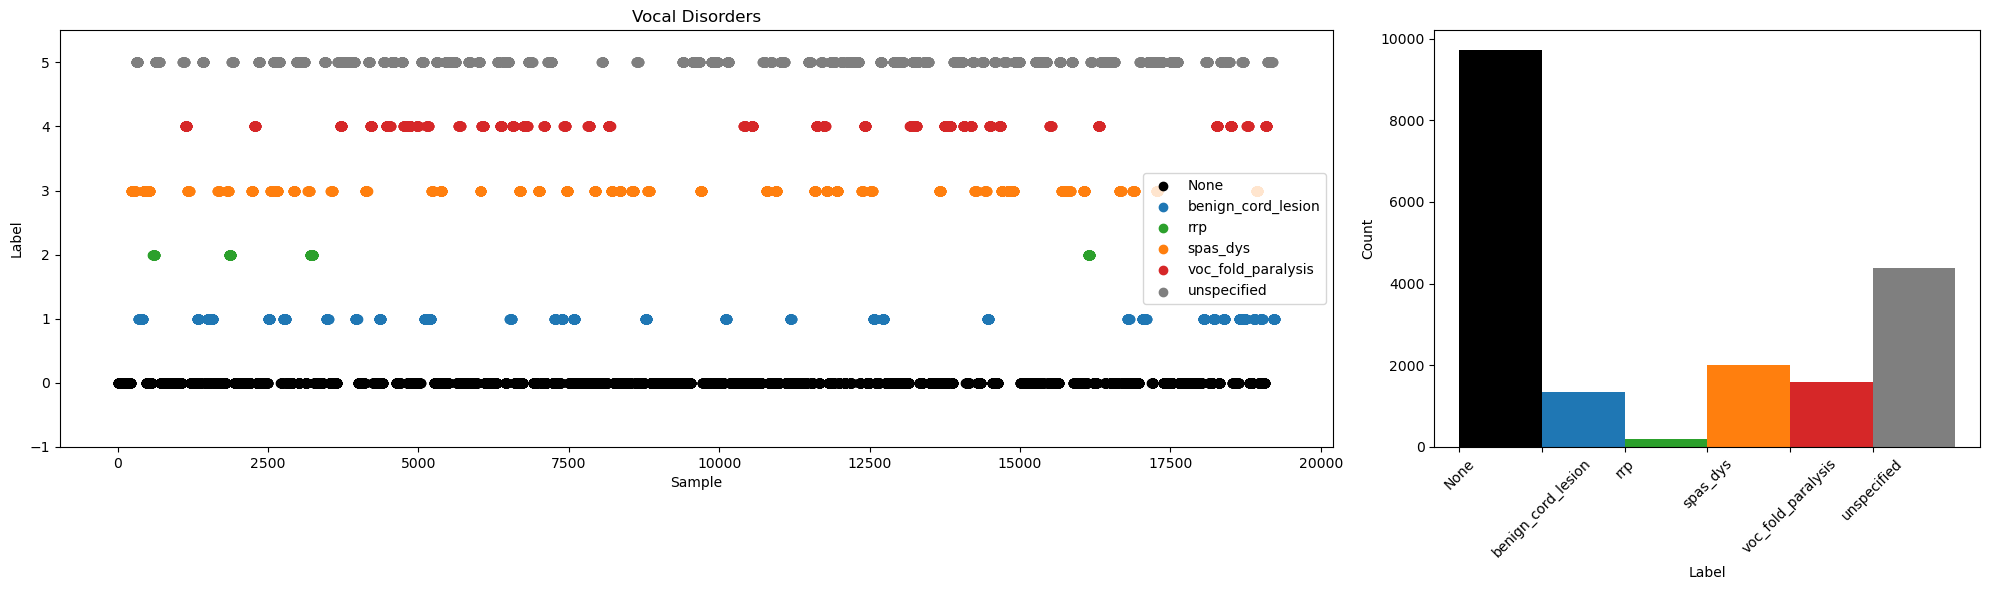

In [121]:
labels = ["None"]+voc_disorders+["unspecified"]
c_map = {0:"black",1:"tab:blue", 2:"tab:green", 3:"tab:orange", 4:"tab:red",5:"tab:grey"}
fig,axes = plt.subplots(1,2,figsize=(20,6),width_ratios=[0.7, 0.3])
for l,lab in zip([0,1,2,3,4,5],labels):
    axes[0].scatter(
        np.where(y_multiclass==l)[0], 
        y_multiclass[np.where(y_multiclass==l)], 
        label=lab,
        color=c_map[l], 
        marker="o"
    )
axes[0].set_ylim([-1,5.5])
axes[0].set_ylabel("Label")
axes[0].set_xlabel("Sample")
axes[0].legend()

n, bins, patches = axes[1].hist(y_multiclass, bins=[0,1,2,3,4,5,6])
for p,c in zip(patches,c_map.values()):
    p.set_facecolor(c)
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
axes[1].set_xticks(np.arange(0,6), labels, rotation=45)

axes[0].set_title("Vocal Disorders")
plt.tight_layout()
plt.show()

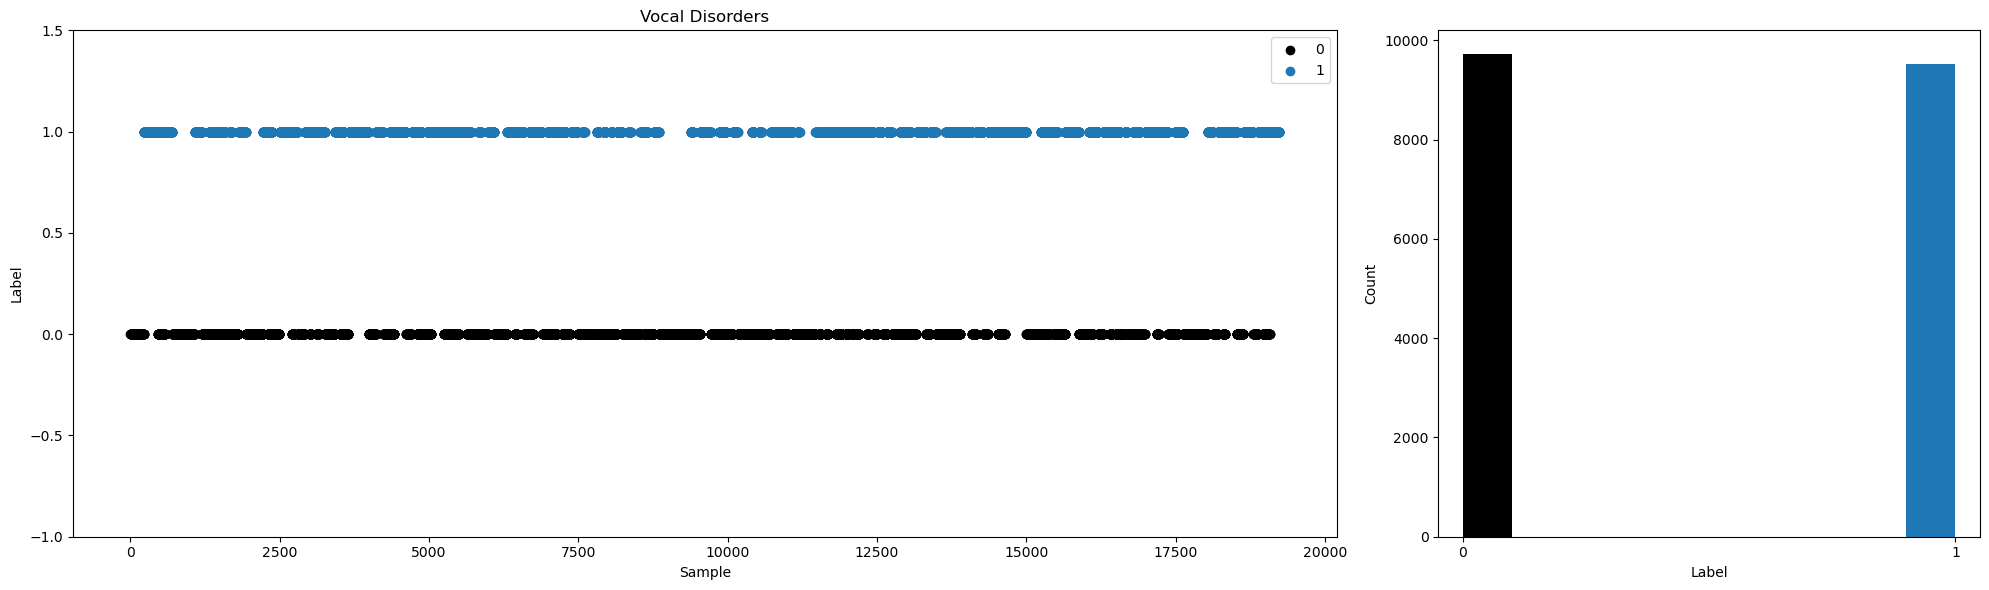

In [95]:
labels = [0,1]
c_map = {0:"black",1:"tab:blue"}
fig,axes = plt.subplots(1,2,figsize=(20,6),width_ratios=[0.7, 0.3])
for l,lab in zip([0,1],labels):
    axes[0].scatter(
        np.where(y==l)[0], 
        y[np.where(y==l)], 
        label=lab,
        color=c_map[l], 
        marker="o"
    )
axes[0].set_ylim([-1,1.5])
axes[0].set_ylabel("Label")
axes[0].set_xlabel("Sample")
axes[0].legend()

n, bins, patches = axes[1].hist(y)
for p,c in zip(patches,c_map.values()):
    p.set_facecolor(c)
axes[1].set_xlabel("Label")
axes[1].set_ylabel("Count")
axes[1].set_xticks([0,1], labels)

axes[0].set_title("Vocal Disorders")
plt.tight_layout()
plt.show()

## Save cleaned data

In [122]:
import pickle

with open("data/X_clean.pkl", 'wb') as f:
    pickle.dump(X, f)
with open("data/y_clean.pkl", 'wb') as f:
    pickle.dump(y, f)
with open("data/y_multiclass_clean.pkl", 'wb') as f:
    pickle.dump(y_multiclass, f)
with open("data/groups.pkl", 'wb') as f:
    pickle.dump(groups, f)